In [1]:
%run ../methodes/ada_boost_definition.ipynb import Ada_Boost_
import pandas as pd

df_train = pd.read_csv('../leaf-classification/train.csv/train.csv').set_index('id')
df_test = pd.read_csv('../leaf-classification/test.csv/test.csv').set_index('id')

In [2]:
# Valeurs à tester : nombre d'estimateurs et taux d'apprentissage
n_estimators_ = [100+10*i for i in range(1,10)]
learning_rates = np.linspace(0.01, 1, 5)

In [3]:
# Initialisation des meilleurs paramètres
err_min = 100
best_n_estimators = -2
best_learning_rate = -2

In [4]:
# Initialisation des tableaux pour l'analyse des données
df_ab_train = pd.DataFrame(0, index = n_estimators_, columns = learning_rates)
df_ab_test = pd.DataFrame(0, index = n_estimators_, columns = learning_rates)

In [5]:
%%capture --no-display
from sklearn.model_selection import KFold

# Pour obtenir de bons résultats on utilise la k-fold cross-validation
kf = KFold(n_splits=10)

for n_estimators in n_estimators_:
    for learning_rate in learning_rates:
            
        # Initialisation de l'erreur moyenne
        err_train = 0
        err_test = 0

        # k-fold cross-validation sur les données d'entraînement
        for train, test in kf.split(df_train):
            x_train = df_train.iloc[train].drop(columns=['species'])
            t_train = df_train.iloc[train]['species']
            x_test = df_train.iloc[test].drop(columns=['species'])
            t_test = df_train.iloc[test]['species']

            # Initialisation du perceptron
            ada_boost = Ada_Boost_(n_estimators, learning_rate)

            # Entraînement
            ada_boost.entrainement(x_train, t_train)

            # Calcul de l'erreur d'entraînement
            pred_train = ada_boost.prediction(x_train)
            err_train += ada_boost.erreur(t_train, pred_train)

            # Calcul de l'erreur de test
            pred_test = ada_boost.prediction(x_test)
            err_test += ada_boost.erreur(t_test, pred_test)

        # Calcul de l'erreur totale
        err_train /= 10
        err_test /= 10
        err = (err_train + err_test) / 2 

        # On garde les données en mémoire
        df_ab_train[learning_rate][n_estimators] = err_train
        df_ab_test[learning_rate][n_estimators] = err_test
                
        # On met à jour les meilleurs paramètres
        if err < err_min:
            err_min = err
            best_n_estimators = n_estimators
            best_learning_rate = learning_rate

Text(0, 0.5, 'erreur moyenne')

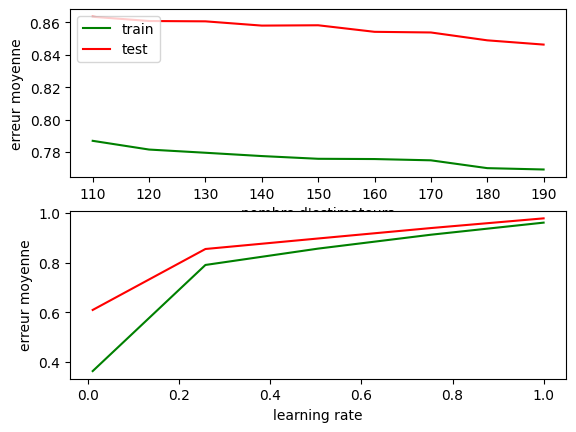

In [6]:
import matplotlib.pyplot as plt
# Représentation graphique

# Evolution de l'erreur moyenne en fonction du nombre d'estimateurs
plt.subplot(2,1,1) 
plt.plot(df_ab_train.index, df_ab_train.mean(axis=1), color='green', label='train')
plt.plot(df_ab_test.index, df_ab_test.mean(axis=1), color='red', label='test')
plt.xlabel('nombre d\'estimateurs')
plt.ylabel('erreur moyenne')
plt.legend(loc="upper left")

# Evolution de l'erreur moyenne en fonction du learning rate
plt.subplot(2,1,2) 
plt.plot(df_ab_train.columns, df_ab_train.mean(axis=0), color='green')
plt.plot(df_ab_test.columns, df_ab_test.mean(axis=0), color='red')
plt.xlabel('learning rate')
plt.ylabel('erreur moyenne')

In [7]:
print('err_min : ', err_min, ' | best number of estimators : ', best_n_estimators, ' | best learning rate : ', best_learning_rate)

err_min :  0.46414141414141413  | best number of estimators :  190  | best learning rate :  0.01
